**Objective**: Build an XGBoost model for predicting heart disease and experiment with hyperparameter tuning to improve its performance.

Dataset: [Heart Disease UCI](https://archive.ics.uci.edu/dataset/45/heart+disease)

# Task 1: Data Loading and Exploration
1. Load the Heart Disease UCI dataset.
2. Explore the dataset to understand its structure and features.
3. Split the data into training and testing sets.

In [17]:
#from ucimlrepo import fetch_ucirepo
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
# fetch dataset
#heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
#X = heart_disease.data.features
#y = heart_disease.data.targets

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_data = pd.read_csv(url, names=column_names, na_values='?')
print(heart_data.shape)
train,test=train_test_split(heart_data,test_size=0.3,random_state=125)
XLabel,yLabel=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],['target']
X_train,y_train,X_test,y_test= train[XLabel],train[yLabel],test[XLabel],test[yLabel]
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(303, 14)
(212, 13) (91, 13) (212, 1) (91, 1)


# Task 2: Data Preprocessing
1. Handle missing values if any.
2. Encode categorical variables using appropriate methods.
3. Standardize or normalize numerical features if necessary.

In [18]:
# insert code here

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

heart_data.isnull().sum()
numerical_features = heart_data.select_dtypes(include=['float64']).columns

categorical_features=['sex','cp','fbs','restecg','exang','slope','ca','thal']
numerical_features = [item for item in numerical_features if item not in categorical_features]
print(numerical_features)
print(categorical_features)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [19]:
imputer= SimpleImputer(strategy='mean')

In [22]:

preprocessor= ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical_features),
        ('cat',OneHotEncoder(sparse_output=False),categorical_features)
    ]
)

preprocessor.set_output(transform='pandas')

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'trestbps', 'chol', 'thalach',
                                  'oldpeak']),
                                ('cat', OneHotEncoder(sparse_output=False),
                                 ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                  'slope', 'ca', 'thal'])])

In [23]:

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


# Task 3: Initial XGBoost Model
1. Build an initial XGBoost model using default hyperparameters.
2. Train the model on the training set and evaluate its performance on the testing set.
3. Note down the accuracy and any other relevant metrics.

In [24]:
# insert code here
# Install xgboost if not already installed
#!pip install xgboost

# Import XGBClassifier from xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Create the classifier
xgb_model = XGBClassifier(random_state=42)
# Fit the classifier to the training data
xgb_model.fit(X_train_preprocessed, y_train)
xgb_predictions = xgb_model.predict(X_test_preprocessed)


# Evaluate the accuracy of the model
default_accuracy = accuracy_score(y_test, xgb_predictions)
print(f'Test accuracy {default_accuracy}')


Test accuracy 0.5604395604395604


# Task 4: Hyperparameter Tuning
1. Experiment with hyperparameter tuning to improve model performance.
2. Adjust hyperparameters such as learning_rate, n_estimators, max_depth, etc.
3. Use techniques like cross-validation to find optimal hyperparameters.
4. Train and evaluate the model with the tuned hyperparameters.

In [25]:
from sklearn.model_selection import GridSearchCV

#commented one are the parameters tested that doesn't improve the accuracy.
parameters_grid = {
      'n_estimators': np.arange(8,20,1),
      'max_depth': np.arange(1,5,1),
      'grow_policy': ['depthwise', 'lossguide'],
      'gamma': np.arange(2,6,1),
      'reg_lambda': np.arange(0.4,1,0.1),
      'booster': ['gbtree'],
      #'max_leaves': [5,7,10,15],
      #'min_child_weight': np.arange(1,50,1),
      #'early_stopping_rounds': np.arange(1,20,1),
      #'num_parallel_tree':[1,3,5,10]
      #'learning_rate': np.arange(0.1,1,0.2)
      
}
# Create GridSearchCV object
grid_search = GridSearchCV(xgb_model, parameters_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_preprocessed, y_train)

# Print the best hyperparameters
#print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_
# Make predictions on the test set using the best model
y_tuned = best_model.predict(X_test_preprocessed)

# Evaluate the accuracy of the best model
accuracy_tuned = accuracy_score(y_test, y_tuned)
print("Best Model Accuracy:", accuracy_tuned)

Best Model Accuracy: 0.6153846153846154


# Task 5: Feature Importance
1. Explore feature importance using the **feature_importances_** attribute of the trained XGBoost model.
2. Identify the most important features for heart disease prediction.

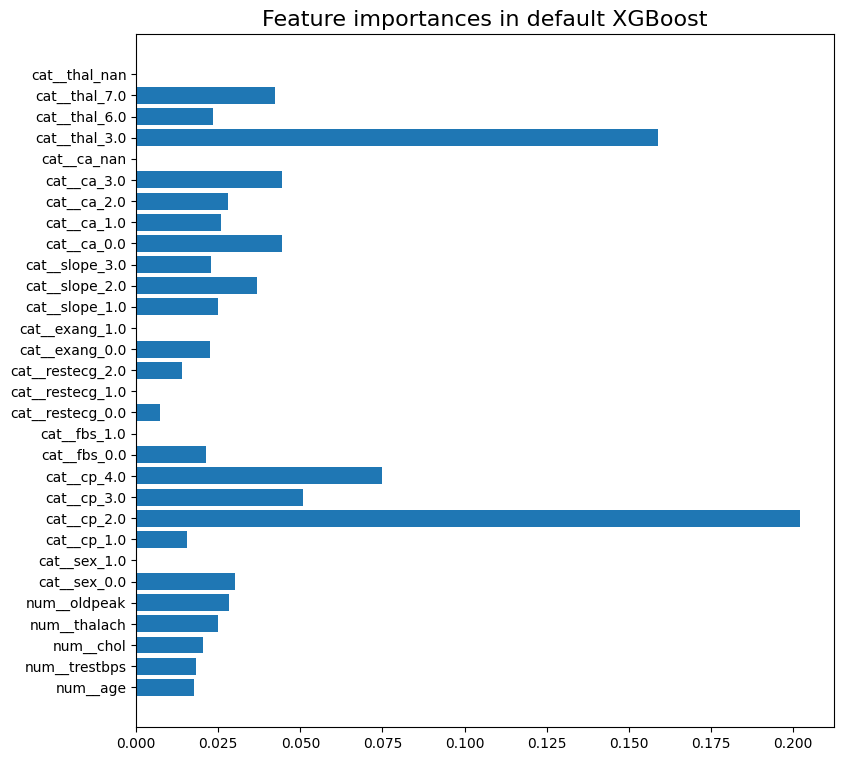

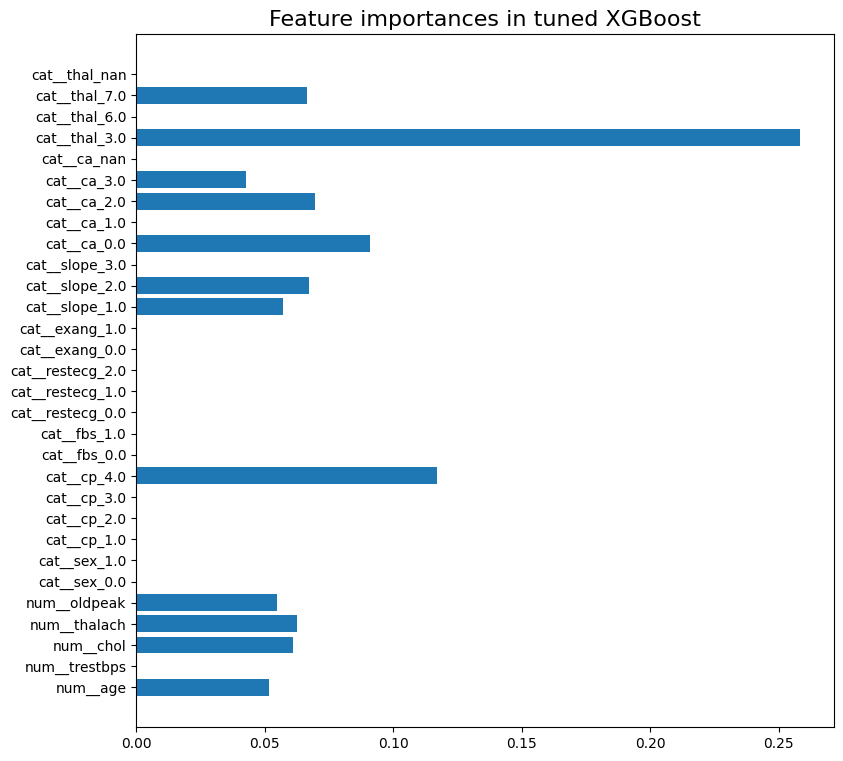

The most important features are:
- cat__thal_3.0 with 0.25847334
- cat__cp_4.0 with 0.11700257
- cat__ca_0.0 with 0.09084535
- cat__ca_2.0 with 0.06954348
- cat__slope_2.0 with 0.06729583
- cat__thal_7.0 with 0.066596515
- num__thalach with 0.06263364
- num__chol with 0.06110702
- cat__slope_1.0 with 0.05702155
- num__oldpeak with 0.05487485


In [26]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(9,9))

# plot feature importance
plt.barh(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
# Add labels to the graph
plt.yticks(range(len(xgb_model.feature_importances_)), np.array(X_test_preprocessed.columns))
plt.title("Feature importances in default XGBoost", fontsize=16)
plt.show()


fig = plt.figure(figsize=(9,9))
# plot feature importance
plt.barh(range(len(best_model.feature_importances_)), best_model.feature_importances_)
# Add labels to the graph
plt.yticks(range(len(best_model.feature_importances_)), np.array(X_test_preprocessed.columns))
plt.title("Feature importances in tuned XGBoost", fontsize=16)
plt.show()

# get importances
importances=list(zip(X_test_preprocessed.columns,best_model.feature_importances_))

# define a function to sort the importances
def take_second(x):
  return x[1]
# sort importances
importances.sort(key=take_second,reverse=True)


print("The most important features are:")
for i in range(10):
  print("-",importances[i][0],"with",importances[i][1])
  i+=1



# Task 6: Model Evaluation
1. Compare the performance metrics of the initial model and the tuned model.
2. Visualize the improvement achieved in a clear and concise manner.
3. Discuss the impact of hyperparameter tuning and feature importance on model performance.

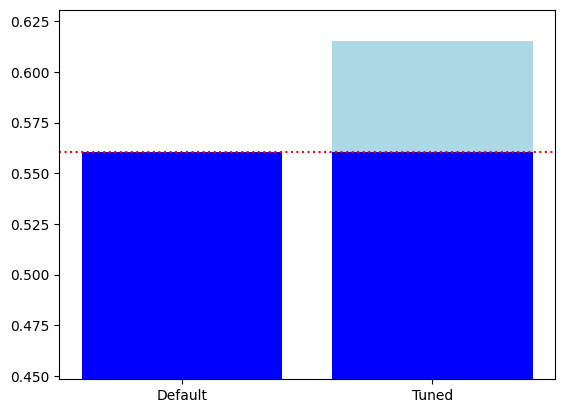

In [27]:
# insert code here
val1=[default_accuracy,default_accuracy]
plt.bar(["Default","Tuned"],val1,color='blue')
plt.bar(["Default","Tuned"],[0,accuracy_tuned-default_accuracy],bottom=val1,color='lightblue')
# Add a dotted line
plt.axhline(y=default_accuracy, color='red', linestyle='dotted')

plt.ylim(default_accuracy-(default_accuracy/5),accuracy_tuned+(accuracy_tuned/40))
plt.show()


Default model confusion matrix:


<Axes: >

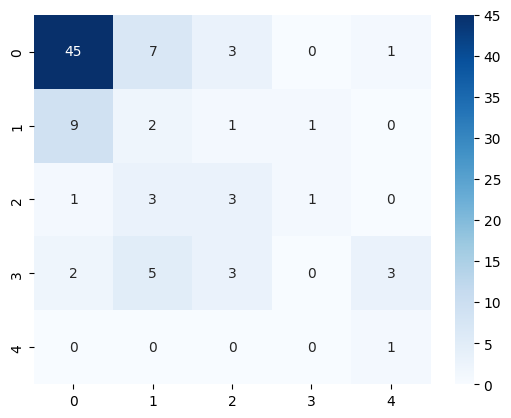

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Default model confusion matrix:")
cm = confusion_matrix(y_test, xgb_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


Tuned model confusion matrix:


<Axes: >

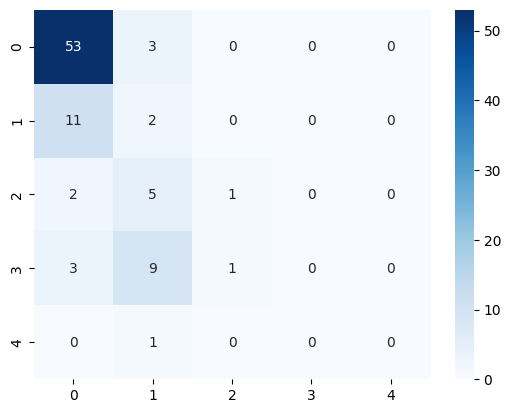

In [29]:

print("Tuned model confusion matrix:")
cm = confusion_matrix(y_test, y_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

The hyperparameter tuning improved the overall accuracy. The tuned model is more precise on the class 0 and less on the other classes. In a balanced dataset this would probably collaps the accuracy. From the feature impotances we can clearly see that there is a major difference between default and tuned model. So we can say that the tuned model's importances are more related to the class 0 (as it get's better result on it), while the features dropped from the tuned model and used more in the default are more useful for the other classes (that the default predict better).